In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('travel_cities_cleaned.csv')
df.head()

,id,city,country,region,short_description,latitude,longitude,ideal_durations,budget_level,culture,...,avg_temp_month_3,avg_temp_month_4,avg_temp_month_5,avg_temp_month_6,avg_temp_month_7,avg_temp_month_8,avg_temp_month_9,avg_temp_month_10,avg_temp_month_11,avg_temp_month_12
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"[""Short trip"",""One week""]",Luxury,5,...,10.5,13.8,17.9,23.5,25.8,25.2,20.8,15.2,8.8,4.7
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"[""Long trip"",""One week""]",Luxury,2,...,26.9,28.0,27.4,26.2,26.1,25.5,26.3,26.0,27.1,28.2
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"[""Short trip"",""Weekend"",""One week""]",Luxury,3,...,0.2,4.6,9.0,14.1,18.2,17.8,14.5,7.6,1.8,-1.8
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"[""Weekend"",""One week"",""Short trip""]",Mid-range,5,...,20.3,23.1,23.3,22.2,20.7,20.6,19.9,19.0,17.7,14.9
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"[""Short trip"",""Weekend""]",Budget,4,...,28.3,29.0,29.3,28.7,28.2,28.4,29.2,29.8,29.6,28.7


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

id                   0
city                 0
country              0
region               0
short_description    0
latitude             0
longitude            0
ideal_durations      0
budget_level         0
culture              0
adventure            0
nature               0
beaches              0
nightlife            0
cuisine              0
wellness             0
urban                0
seclusion            0
avg_temp_month_1     0
avg_temp_month_2     0
avg_temp_month_3     0
avg_temp_month_4     0
avg_temp_month_5     0
avg_temp_month_6     0
avg_temp_month_7     0
avg_temp_month_8     0
avg_temp_month_9     0
avg_temp_month_10    0
avg_temp_month_11    0
avg_temp_month_12    0
dtype: int64

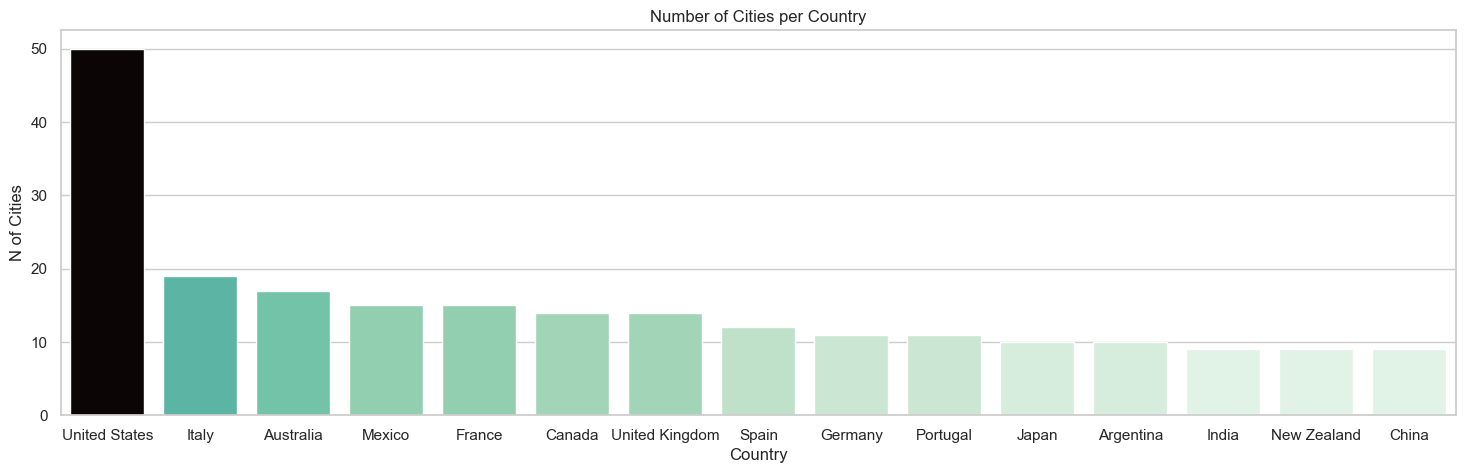

In [5]:
sns.set(style = "whitegrid")

top15_countries = df['country'].value_counts().nlargest(15)

plt.figure(figsize = (18, 5))
sns.barplot(x = top15_countries.index, y = top15_countries.values, palette = 'mako_r', hue = top15_countries, legend = False)
plt.xlabel('Country')
plt.ylabel('N of Cities')
plt.title('Number of Cities per Country')
plt.show()

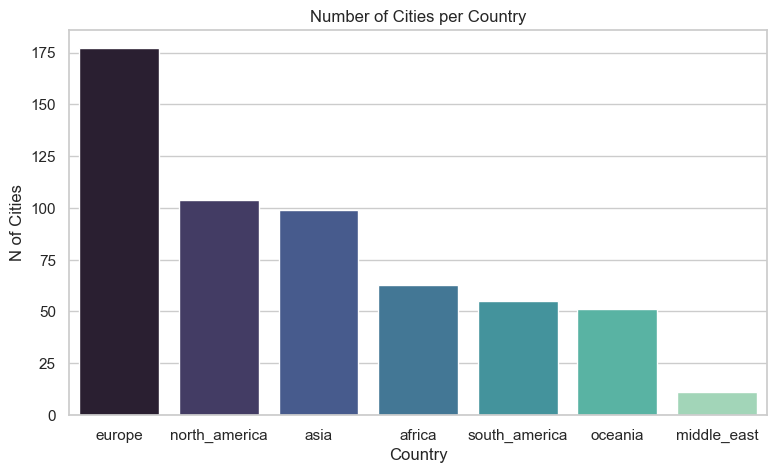

In [6]:
order_regions = df['region'].value_counts().index
plt.figure(figsize = (9, 5))
sns.countplot(data = df, x = 'region', order = order_regions, palette = "mako", hue = 'region', hue_order = order_regions, legend = False)
plt.xlabel('Country')
plt.ylabel('N of Cities')
plt.title('Number of Cities per Country')
plt.show()

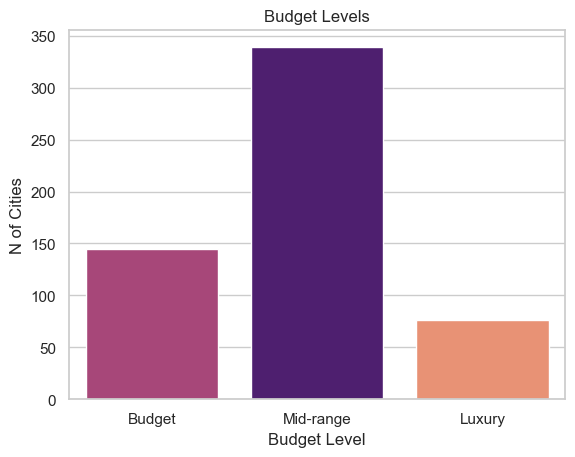

In [7]:
sns.countplot(data = df, x = 'budget_level', order = ['Budget','Mid-range', 'Luxury'], palette = "magma", hue = df['budget_level'], hue_order = df['budget_level'].value_counts().index, legend = False)
plt.xlabel('Budget Level')
plt.ylabel('N of Cities')
plt.title('Budget Levels')
plt.show()

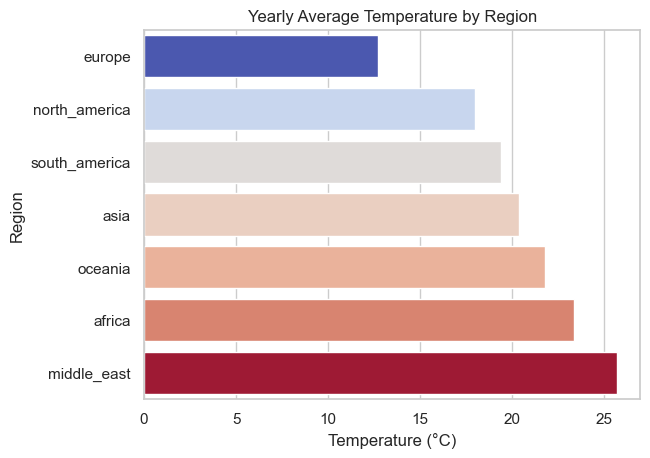

In [8]:
df['avg_temp_year'] = df[[f'avg_temp_month_{m}' for m in range(1, 13)]].mean(axis = 1)

region_avg_temp = df.groupby('region')['avg_temp_year'].mean().sort_values()

sns.barplot(x = region_avg_temp.values, y = region_avg_temp.index, palette = "coolwarm", hue = region_avg_temp, legend = False)
plt.xlabel('Temperature (°C)')
plt.ylabel('Region')
plt.title('Yearly Average Temperature by Region')
plt.show()

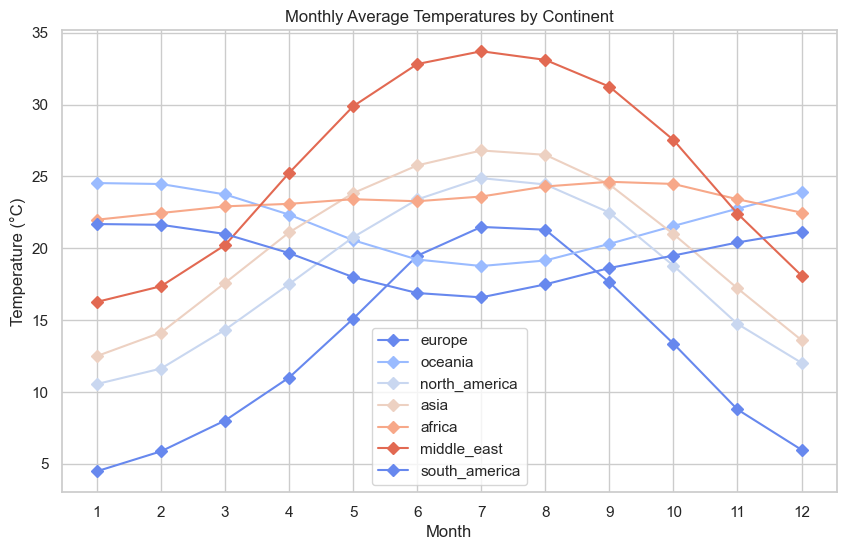

In [9]:
sns.set_palette("coolwarm")

regions = df['region'].unique()

plt.figure(figsize=(10, 6))

for region in regions:
    region_data = df[df['region'] == region]
    
    temp = [region_data[f'avg_temp_month_{m}'].mean() for m in range(1, 13)]
    
    plt.plot(range(1, 13), temp, marker='D', label=region)

plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperatures by Continent')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

In [10]:
df['avg_temp_year'] = df[[f'avg_temp_month_{m}' for m in range(1, 13)]].mean(axis = 1).round(2)

hottest_cities = df[['city', 'country', 'avg_temp_year']].sort_values(by='avg_temp_year', ascending=False).head(10)
coldest_cities = df[['city', 'country', 'avg_temp_year']].sort_values(by='avg_temp_year', ascending=True).head(10)

In [11]:
hottest_cities

,city,country,avg_temp_year
410,Dubai,United Arab Emirates,29.40
507,Santa Marta,Colombia,29.36
178,Bangkok,Thailand,29.26
461,Abu Dhabi,United Arab Emirates,29.25
174,Koh Lanta,Thailand,29.16
33,Malé,Maldives,29.16
466,Funafuti,Tuvalu,29.08
52,Phnom Penh,Cambodia,29.05
122,Doha,Qatar,28.97
186,Muscat,Oman,28.90


In [12]:
coldest_cities

,city,country,avg_temp_year
191,Svalbard,Norway,-4.10
5,Nuuk,Greenland,-0.57
331,Ulaanbaatar,Mongolia,0.04
543,Yellowstone National Park,United States,0.31
197,El Chaltén,Argentina,0.91
192,Lapland,Finland,1.12
456,Murmansk,Russia,1.23
552,Rovaniemi,Finland,2.77
58,Banff,Canada,3.12
246,Anchorage,United States,3.51


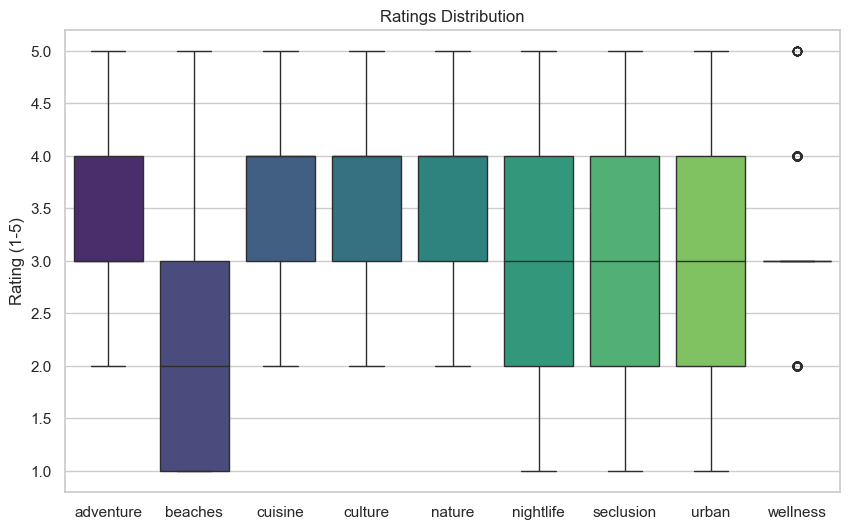

In [13]:
rating_cols = [
    'adventure', 'beaches', 'cuisine', 'culture', 'nature', 'nightlife', 'seclusion', 'urban', 'wellness'
]

plt.figure(figsize = (10, 6))
sns.boxplot(data = df[rating_cols], palette = "viridis")
plt.ylabel('Rating (1-5)')
plt.title('Ratings Distribution')
plt.show()

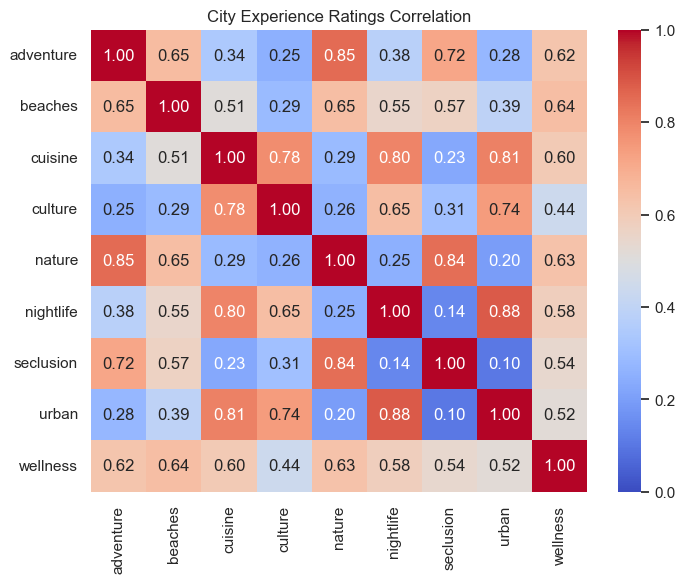

In [14]:
corr_matrix = df[rating_cols].corr()
corr_transformed = (corr_matrix + 1) / 2

plt.figure(figsize=(8, 6))
sns.heatmap(corr_transformed, annot = True, cmap = 'coolwarm', vmin = 0, center = 0.5, vmax = 1, fmt='.2f')
plt.title('City Experience Ratings Correlation')
plt.show()